In [3]:
library(dplyr) 
library(reshape2)

In [4]:
# I analyzed the same datasets used in CA4.
# Data are related to the Covid pandemic and I tried to understand if the trend of cases/deaths has been impacted by the
# different categories of measures implemented by each country government.
# I used four different dataset: 1- Government measures dataset provided by ACAPS; 2/3- Time series of confirmed 
# cases/deaths provided by CSSE (John Hopkins); 4-Mapping file of country/region provided by https://ourworldindata.org/

In [5]:
# Load the measures file and create a dataframe
measures <- read.csv("C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA5\\acaps_covid19_government_measures_dataset.csv", sep = ";", header = TRUE)

df_measures <- data.frame(measures)

In [6]:
# Let's have a look at the dataframe structure
str(df_measures)

'data.frame':	11200 obs. of  17 variables:
 $ ID                : int  1 2 3 4 5 6 8 10 12 17 ...
 $ COUNTRY           : Factor w/ 196 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ISO               : Factor w/ 193 levels "AFG","AGO","ALB",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ADMIN_LEVEL_NAME  : Factor w/ 595 levels ""," "," Al-Qatif ",..: 1 246 1 1 1 1 221 221 1 1 ...
 $ PCODE             : logi  NA NA NA NA NA NA ...
 $ REGION            : Factor w/ 6 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ LOG_TYPE          : Factor w/ 2 levels "Introduction / extension of measures",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CATEGORY          : Factor w/ 6 levels "Governance and socio-economic measures",..: 5 5 5 1 6 4 6 6 5 1 ...
 $ MEASURE           : Factor w/ 41 levels "Additional health/documents requirements upon arrival",..: 18 21 3 14 24 5 34 24 37 22 ...
 $ TARGETED_POP_GROUP: Factor w/ 3 levels "No","No ","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ COMMENTS          : Factor w/ 10877 levels ""

In [7]:
# There are 11200 observations with 17 variables
# Let's have a look at some data
head(df_measures, 5)

ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE
1,Afghanistan,AFG,,NA,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border crossings,No,,,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,14/03/2020
2,Afghanistan,AFG,Kabul,NA,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,,,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,14/03/2020
3,Afghanistan,AFG,,NA,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,,,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,14/03/2020
4,Afghanistan,AFG,,NA,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated or established,No,,,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-meeting-international-health-partners-fight-against-spread-and-control-covid-19,14/03/2020
5,Afghanistan,AFG,,NA,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,,12/03/2020,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavirus-afghanistan-scraps-annual-nevruz-festival/1763830,14/03/2020


In [8]:
# I made the same decision as CA4. I decided to analyze the measures of type 'Introduction/extension of measures'
# As I want to match the data with the time series I decided to filter out the measures without the date implemented
df_measures <- subset(df_measures, LOG_TYPE == 'Introduction / extension of measures')

df_measures <- subset(df_measures, DATE_IMPLEMENTED != "")

In [9]:
# I create the dataframe with the desired columns
measures_by_country <- select(df_measures, COUNTRY ,REGION, CATEGORY, DATE_IMPLEMENTED)

In [10]:
# I realized that countries have a different definition from the files with time series
# In order to avoid thta the joins don't work I remapped some countries that I know to be different in the next dataframes
measures_by_country$COUNTRY <- as.character(measures_by_country$COUNTRY)
measures_by_country$COUNTRY[tolower(measures_by_country$COUNTRY) == "czech republic"] <- "Czechia"
measures_by_country$COUNTRY[tolower(measures_by_country$COUNTRY) == "moldova republic of"] <- "Moldova"
measures_by_country$COUNTRY[tolower(measures_by_country$COUNTRY) == "North Macedonia Republic Of"] <- "North Macedonia"
measures_by_country$COUNTRY[measures_by_country$COUNTRY == "Russian Federation"] <- "Russia"
measures_by_country$COUNTRY <- as.factor(measures_by_country$COUNTRY)

In [11]:
# Load the file with time series on covid confirmed cases and create the dataframe
cases <- read.csv("C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA5\\time_series_covid19_confirmed_global.csv", sep = ",", header = TRUE)

cases <- data.frame(cases)

In [12]:
# Let's have a look at the dataframe structure
str(cases)

'data.frame':	266 obs. of  129 variables:
 $ Province.State: Factor w/ 82 levels "","Alberta","Anguilla",..: 1 1 1 1 1 1 1 1 6 50 ...
 $ Country.Region: Factor w/ 188 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 9 ...
 $ Lat           : num  33 41.2 28 42.5 -11.2 ...
 $ Long          : num  65 20.17 1.66 1.52 17.87 ...
 $ X1.22.20      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1.23.20      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1.24.20      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1.25.20      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1.26.20      : int  0 0 0 0 0 0 0 0 0 3 ...
 $ X1.27.20      : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X1.28.20      : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X1.29.20      : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X1.30.20      : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X1.31.20      : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X2.1.20       : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X2.2.20       : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X2.3.20       : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X2.4.20       : int  0 0 0 0 0 0 0 0 0 4 ...
 $ X2.5.2

In [14]:
# There are 266 observations with 129 variables.
# The variables (columns) are the dates from 22/01/2020 to 25/05/2020 in which the data have been registered
# These columns are integer and have a fomrat not esaily readable (see below for conversion)
# Let's have a look at some data
head(cases, 5)

Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,...,X5.16.20,X5.17.20,X5.18.20,X5.19.20,X5.20.20,X5.21.20,X5.22.20,X5.23.20,X5.24.20,X5.25.20
,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
,Albania,41.1533,20.1683,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [15]:
# I select the rows with Province.State empty in order to avoid getting data for the overseas territorial collectivity
# I exclude the column not useful
# I reshape the dataframe in order to transpose the columns in rows
cases <- subset(cases, Province.State == "" )
cases <- select(cases, -Province.State ,-Lat, -Long)
cases <- melt(cases, id = "Country.Region")

In [16]:
# Let's have a look at the reshaped dataframe
head(cases,5)

Country.Region,variable,value
Afghanistan,X1.22.20,0
Albania,X1.22.20,0
Algeria,X1.22.20,0
Andorra,X1.22.20,0
Angola,X1.22.20,0


In [17]:
# I convert the column 'variable' in a date with the desired format
# I rename the columns with a more meaningful description
cases$variable <- as.Date(as.Date(cases$variable , format = "X%m.%d.%y"), format ="%d/%m/%y")

colnames(cases)[2] <- "date"
colnames(cases)[3] <- "cases"

In [21]:
# Load the file with covid deaths and create the dataframe
# The structure of this dataset is the same of the previous one

deaths <- read.csv("C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA4\\time_series_covid19_deaths_global.csv", sep = ",", header = TRUE)

deaths <- data.frame(deaths)

In [22]:
# I approach with the same logic used for the cases dataframe
deaths <- subset(deaths, Province.State == "" )
deaths <- select(deaths, -Province.State ,-Lat, -Long)
deaths <- melt(deaths, id = "Country.Region")

In [23]:
deaths$variable <- as.Date(as.Date(deaths$variable , format = "X%m.%d.%y"), format ="%d/%m/%y")

colnames(deaths)[2] <- "date"
colnames(deaths)[3] <- "deaths"

In [24]:
# Let's have a look at the final file
head(deaths,5)

Country.Region,date,deaths
Afghanistan,2020-01-22,0
Albania,2020-01-22,0
Algeria,2020-01-22,0
Andorra,2020-01-22,0
Angola,2020-01-22,0


In [25]:
# I merge the two dataset with covid data. 
# The inner join is used because the two datframe have the same countries and dates. No risk of loosing information from
# one of the two datasets
# I filter out the rows with deaths and cases = 0 
covid_data <- merge(cases, deaths, by = c("Country.Region", "date"))
covid_data <- subset(covid_data, cases > 0 & deaths > 0)

In [26]:
# Before joining the covid_data dataframe with the measures one I need to associate the region to the covid_data 
# I load a file containing the mapping of country/region in the world
mapping <- read.csv("C:\\Users\\Romina\\Desktop\\DBSCourse\\ProgrammingBigData\\CA5\\continents-according-to-our-world-in-data.csv", sep = ",", header = TRUE)

In [27]:
# Let's have a look at the mapping dataframe
head(mapping,5)

Entity,Code,Year,X
Abkhazia,OWID_ABK,2015,Asia
Afghanistan,AFG,2015,Asia
Akrotiri and Dhekelia,OWID_AKD,2015,Asia
Albania,ALB,2015,Europe
Algeria,DZA,2015,Africa


In [31]:
# I have to merge the covid_data region column with the Entity column of mapping df. 
# In order to avoid loosing data from the covid df I choose a left join wiht the covid_data df on the left side
covid_data_region <- merge(covid_data, mapping, by.x = "Country.Region", by.y = "Entity", all.x = TRUE )

In [32]:
# I exclude the columns not usefule and rename the X one
covid_data_region <- select(covid_data_region, -Code ,-Year)
colnames(covid_data_region)[5] <- "Region"

In [33]:
#Let's have a look at the covid_data dataframe
head(covid_data_region,5)

Country.Region,date,cases,deaths,Region
Afghanistan,2020-03-25,84,2,Asia
Afghanistan,2020-03-24,74,1,Asia
Afghanistan,2020-04-15,784,25,Asia
Afghanistan,2020-03-26,94,4,Asia
Afghanistan,2020-04-14,714,23,Asia


In [34]:
# I remap a specific country name in order to avoid error during the join
covid_data_region$Country.Region <- as.character(covid_data_region$Country.Region)
covid_data_region$Country.Region[tolower(covid_data_region$Country.Region) == "czech republic"] <- "Czechia"
covid_data_region$Country.Region <- as.factor(covid_data_region$Country.Region)

In [35]:
# Before joining the covid data with the measures dataframe I convert the 'DATE_IMPLEMENTED' to a date
measures_by_country$DATE_IMPLEMENTED <- as.Date(measures_by_country$DATE_IMPLEMENTED , format = "%d/%m/%y")

In [36]:
# I join the covid data with the measures dataframe. 
# I use a full outer join because: there are some measures implemented before the first date available in the time series,
# measures have not been implemented every day so we have covid data in some days without measures assigned
dataset <- merge(measures_by_country, covid_data_region, by.x = c("COUNTRY","DATE_IMPLEMENTED","REGION"), by.y = c("Country.Region","date","Region"), all = TRUE)

In [37]:
# I decide analysing the European situation. I create a subset from the previous dataframe
Europe_df <- subset(dataset, REGION == "Europe" )

In [38]:
# I decided to analyze the trend of cases/deaths for each country
# In order to avoid a messy plot I decided to plot the top 10 countries for # of deaths and # of cases
# To aim this plot I proceed in this way:
# 1- Creating two dataframes with the max # of deaths and max # of cases for each country (I decided for the max because
# the data from time series datasets are cumulative):

Europe_cases_max <- Europe_df %>% group_by(COUNTRY) %>% summarise_at(vars(cases), ~ max(., na.rm = TRUE)) 
Europe_deaths_max <- Europe_df %>% group_by(COUNTRY) %>% summarise_at(vars(deaths), ~ max(., na.rm = TRUE))

In [39]:
#2 - Creating two dataframes with decreasing order of deaths/cases from previous dataframes
top10_Europe_cases <- Europe_cases_max$COUNTRY [order (Europe_cases_max$cases,  decreasing = TRUE)]
top10_Europe_deaths <- Europe_deaths_max$COUNTRY [order (Europe_deaths_max$deaths,  decreasing = TRUE)]

In [40]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


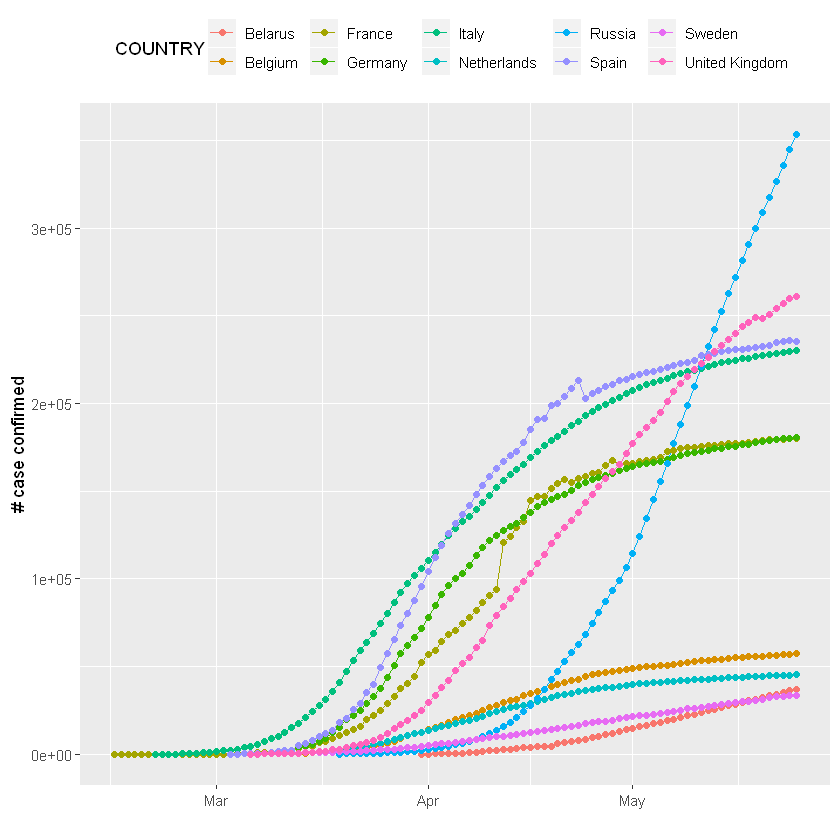

In [41]:
# Plot the trend of cases for the top 10 countries 
ggplot(data = subset(Europe_df, COUNTRY %in% top10_Europe_cases [1 : 10] & !(is.na(Europe_df$cases))), aes(x=DATE_IMPLEMENTED, y=cases, group=COUNTRY)) +
  geom_line(aes(color=COUNTRY))+
  geom_point(aes(color=COUNTRY))+
  xlab("")+
  ylab("# case confirmed")+
  theme(legend.position="top")

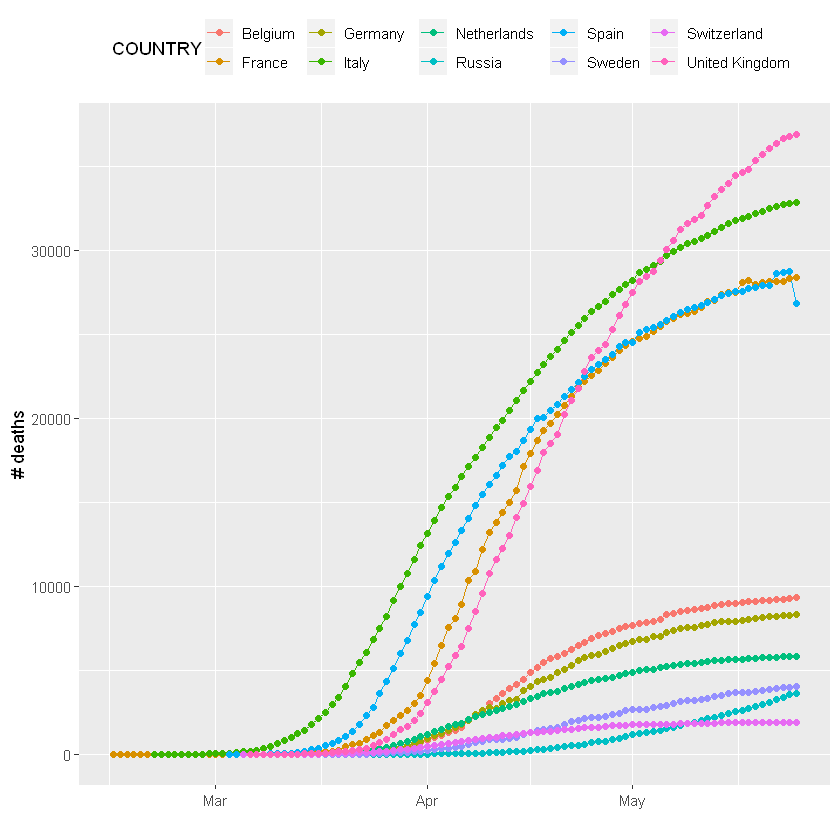

In [42]:
# Plot the trend of deaths for the top 10 countries
ggplot(data = subset(Europe_df, COUNTRY %in% top10_Europe_deaths [1 : 10] & !(is.na(Europe_df$deaths))), aes(x=DATE_IMPLEMENTED, y=deaths, group=COUNTRY)) +
  geom_line(aes(color=COUNTRY))+
  geom_point(aes(color=COUNTRY))+
  xlab("")+
  ylab("# deaths")+
  theme(legend.position="top")

In [43]:
# Most part of the countries are falling in the top 10 for both # of deaths and # of cases (Italy, Germany, France, Spain,
# United Kingdom, Russia)
# The Russian trends have picked my attention because the # of cases seem increased in May more than in the other countries 
# the # of deaths, on the otherhand, has been the lowest.
# The German situation is interesting as well because,despite the high # of cases (very similar to the French trend),
# it has registered a lower trend of deaths.

In [44]:
# I decided to analyze the relation (if existing) between the # of measures implemented by each government and the 
# of deaths through a scatter plot

# To build the plot I proceed in this way:
# 1- Create a first dataframe with max # of detahs and max # of cases for each countries
first_df <- Europe_df %>% group_by(COUNTRY) %>% summarise(max(deaths, na.rm = TRUE), max(cases, na.rm = TRUE))

In [45]:
# 2- Create a second dataframe with # of measures for each country:
second_df <- subset(Europe_df, !(is.na(Europe_df$CATEGORY))) %>% group_by(COUNTRY) %>% count()

In [46]:
# 3- Create the dataframe for the scatter plot merging the two previous ones:
scatter_df <- merge(first_df, second_df)

colnames(scatter_df)[2] <- "deaths"
colnames(scatter_df)[3] <- "cases"
colnames(scatter_df)[4] <- "measures"

In [47]:
# I plot only the top 10 countries for # of deaths. I create a subset from the previous dataframe:
scatter_df <- subset(scatter_df, COUNTRY %in% top10_Europe_deaths [1 : 10])

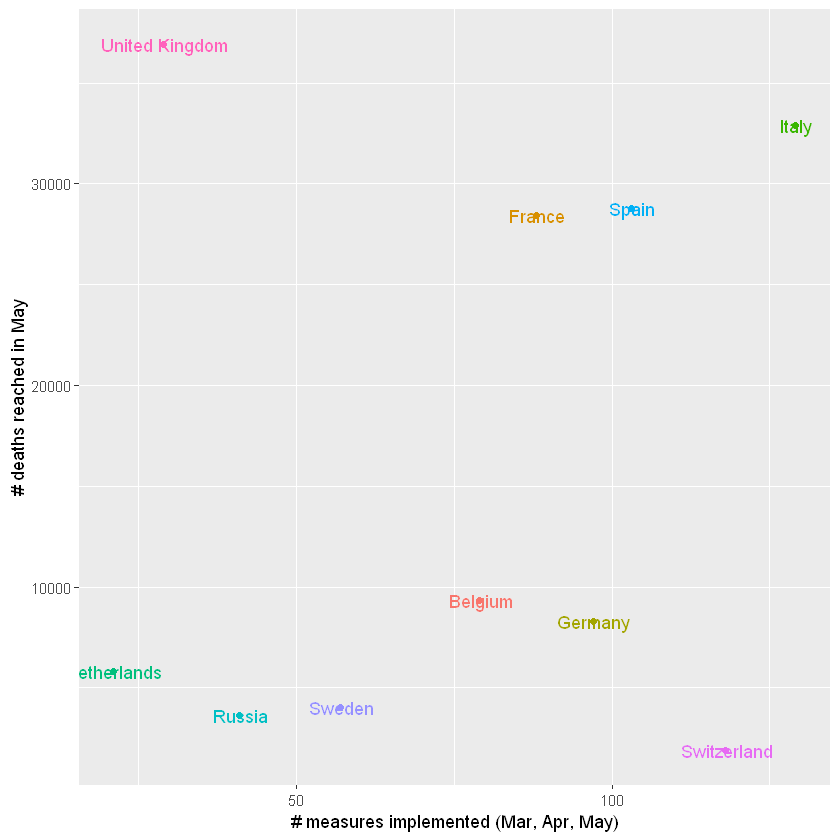

In [48]:
# Scatterplot with # of measures and # of deaths for the top 10 countries:
ggplot(scatter_df, aes(x=measures, y = deaths, color = COUNTRY)) +
  geom_point() +
  geom_text(
    label = scatter_df$COUNTRY,
    nudge_x = 0.25, nudge_y = -0.25,
    check_overlap = T
  )+
  xlab("# measures implemented (Mar, Apr, May)")+
  ylab("# deaths reached in May")+
  theme(legend.position = "none")

In [49]:
# The United Kingdom and Switzerland seem to be the only ones that can demonstrate a direct correlation
# between the # of measures implemented and the effects on covid letality (United Kingdom with the highest # of deaths
# has implemented the lowest # of measures; Switzerland with the lowest # of deaths has implemented one of the highest 
# # of measures).
# What about Russia with low # of measures and low # of deaths?  What about Germany with the same # of measures as Spain
# but with a lower # of deaths? What about Italy with the highest # of measures and # of deaths close to england?

In [50]:
# I decided to analyze for the countries highlighted above the categories of measures implemented
# To plot them I created a dataframe containing the # of measures for each category in each country
measures_by_category <- subset(Europe_df, !(is.na(Europe_df$CATEGORY))) %>% group_by(COUNTRY, CATEGORY) %>% count() 
colnames(measures_by_category)[3] <- "measures"

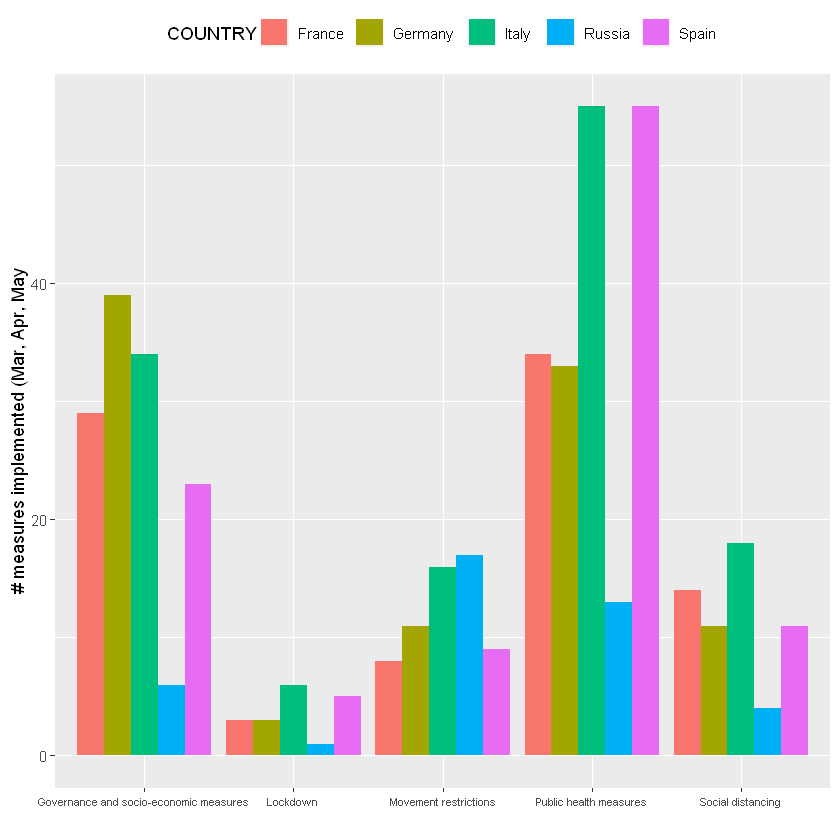

In [56]:
# Plot the # of measures for each category for 5 countries with opposite behaviour (Russia, Germany, France, Italy, Spain)
ggplot(data = subset(measures_by_country, COUNTRY %in% list('Russia','France','Italy','Spain','Germany')), aes(x=CATEGORY, fill = COUNTRY )) +
  geom_bar(position = position_dodge(width = 0.9))+
  xlab("")+
  ylab("# measures implemented (Mar, Apr, May")+
  theme(legend.position = "top", axis.text.x = element_text(size = 6.5))

In [57]:
# The German trend could be explained by the higher # of both 'Governance and socio-economic measures' and 'Public health'
# Russia have implemented the higher # of 'Movement restrictions' measures. Nevertheless the difference with the Italian 
# number seems not enough to explain the big difference in the # of deaths.
# Analyzing the different categories of measures is not enough to explain the deaths trend.
# Probably it could be interesting to match these data with different information such as : population, density population,
# type of health system, type of lockdown implemented.